#Libraries

In [ ]:
import pandas as pd #Untuk menyimpan data
import numpy as np #Untuk bekerja dengan array
import seaborn as sns #Untuk visualisasi
import matplotlib.pyplot as plt #Untuk visualisasi
from sklearn.preprocessing import LabelEncoder #Untuk mengubah data kategorikal menjadi numerik
from sklearn.model_selection import train_test_split #Untuk pemisahan data
from sklearn.ensemble import RandomForestRegressor #Model RandomForest
from sklearn.linear_model import LinearRegression #Model Linear Regression
from sklearn.tree import DecisionTreeRegressor #Model Decision Tree
from sklearn.metrics import mean_squared_error #Untuk evaluasi performa model
from sklearn.metrics import mean_absolute_error #Untuk evaluasi performa model
from sklearn.metrics import r2_score #Untuk evaluasi performa model

#Data

In [ ]:
#Membaca Data
df = pd.read_csv('/content/laptop_price.csv',
                encoding='ISO-8859-1')
df.head(4)

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45


In [ ]:
df.shape

(1303, 13)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


In [ ]:
df.describe(include='all')

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
count,1303.000000,1303,1303,1303,1303.000000,1303,1303,1303,1303,1303,1303,1303,1303.000000
unique,NaN,19,618,6,NaN,40,118,9,39,110,9,179,NaN
top,NaN,Dell,XPS 13,Notebook,NaN,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,2.2kg,NaN
freq,NaN,297,30,727,NaN,507,190,619,412,281,1072,121,NaN
mean,660.155794,NaN,NaN,NaN,15.017191,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1123.686992
std,381.172104,NaN,NaN,NaN,1.426304,NaN,NaN,NaN,NaN,NaN,NaN,NaN,699.009043
min,1.000000,NaN,NaN,NaN,10.100000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,174.000000
25%,331.500000,NaN,NaN,NaN,14.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,599.000000
50%,659.000000,NaN,NaN,NaN,15.600000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,977.000000
75%,990.500000,NaN,NaN,NaN,15.600000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1487.880000


In [ ]:
df.isnull().sum()

laptop_ID           0
Company             0
Product             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price_euros         0
dtype: int64

#Pre-processing Data

In [ ]:
#Membuang Kolom laptop_ID
df.drop(columns = 'laptop_ID', inplace = True)

In [ ]:
#Mengubah Nilai pd Kolom Price_euros menjadi dalam rupiah
df = df.rename(columns={'Price_euros':'Price_rupiah'})
df['Price_rupiah'] = df['Price_rupiah'] * 16030.30
df.head(4)

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_rupiah
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,2.147563e+07
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,1.441028e+07
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,9.217422e+06
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,4.067608e+07


In [ ]:
df['Price_rupiah'] = df['Price_rupiah'].round(0)
df.head(4)

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_rupiah
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,21475633.0
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,14410278.0
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,9217422.0
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,40676085.0


In [ ]:
df2 = df.copy()

df2['Weight'] = df2['Weight'].str.replace('kg', '')
df2['Ram'] = df2['Ram'].str.replace('GB', '')
df2['Weight'] = df2['Weight'].astype(float)
df2['Ram'] = df2['Ram'].astype(int)
df2.head(4)

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_rupiah
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,21475633.0
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,14410278.0
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,9217422.0
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,40676085.0


In [ ]:
df2.describe(include="all")

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_rupiah
count,1303,1303,1303,1303.000000,1303,1303,1303.000000,1303,1303,1303,1303.000000,1.303000e+03
unique,19,618,6,NaN,40,118,NaN,39,110,9,NaN,NaN
top,Dell,XPS 13,Notebook,NaN,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,NaN,256GB SSD,Intel HD Graphics 620,Windows 10,NaN,NaN
freq,297,30,727,NaN,507,190,NaN,412,281,1072,NaN,NaN
mean,NaN,NaN,NaN,15.017191,NaN,NaN,8.382195,NaN,NaN,NaN,2.038734,1.801304e+07
std,NaN,NaN,NaN,1.426304,NaN,NaN,5.084665,NaN,NaN,NaN,0.665475,1.120532e+07
min,NaN,NaN,NaN,10.100000,NaN,NaN,2.000000,NaN,NaN,NaN,0.690000,2.789272e+06
25%,NaN,NaN,NaN,14.000000,NaN,NaN,4.000000,NaN,NaN,NaN,1.500000,9.602150e+06
50%,NaN,NaN,NaN,15.600000,NaN,NaN,8.000000,NaN,NaN,NaN,2.040000,1.566160e+07
75%,NaN,NaN,NaN,15.600000,NaN,NaN,8.000000,NaN,NaN,NaN,2.300000,2.385116e+07


In [ ]:
kolom = ['Company', 'Product', 'ScreenResolution',
         'Cpu', 'TypeName', 'Memory', 'Gpu', 'OpSys']

In [ ]:
#Mengubah menjadi Numerik
for col in kolom:
  df2[col] = df2[col].astype('category').cat.codes

df2.head(4)

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_rupiah
0,1,300,4,13.3,23,65,8,4,58,8,1.37,21475633.0
1,1,301,4,13.3,1,63,8,2,51,8,1.34,14410278.0
2,7,50,3,15.6,8,74,8,16,53,4,1.86,9217422.0
3,1,300,4,15.4,25,85,16,29,9,8,1.83,40676085.0


#EDA

In [ ]:
def plot_cat_var(df, var):
    df = df.copy()
    print(f'Total dari {var}: ',df[var].nunique())
    print(f'{var} Laptop: ', df[var].unique())
    plt.figure(figsize = (15, 7))
    plt.title(f'Distribusi dari {var} berdasarkan Harga Jual')
    sns.barplot(
        x = var,
        y = 'Price_rupiah',
        data = df
    )
    plt.xticks(rotation = 'vertical')
    plt.ylabel('Harga dalam Rupiah')
    plt.show()

In [ ]:
cat_vars = ['Company', 'TypeName', 'Memory', 'Ram',
            'ScreenResolution', 'OpSys']

Total dari Company:  19
Company Laptop:  ['Apple' 'HP' 'Acer' 'Asus' 'Dell' 'Lenovo' 'Chuwi' 'MSI' 'Microsoft'
 'Toshiba' 'Huawei' 'Xiaomi' 'Vero' 'Razer' 'Mediacom' 'Samsung' 'Google'
 'Fujitsu' 'LG']


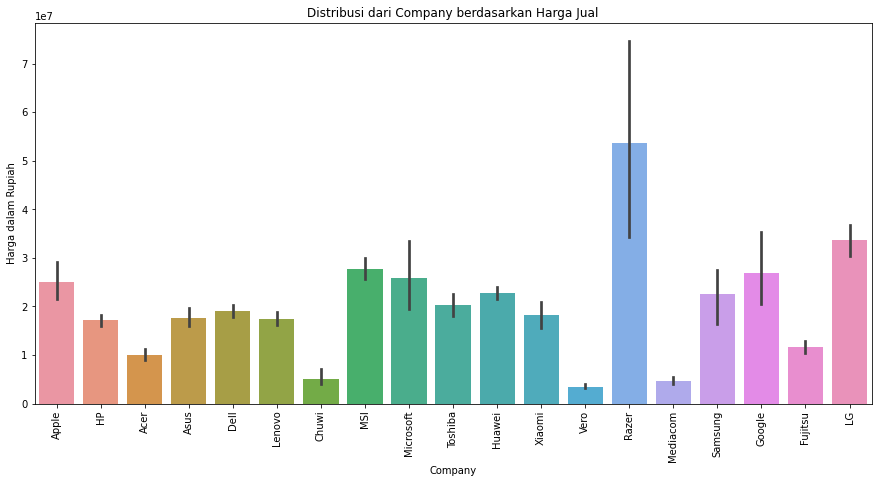

Total dari TypeName:  6
TypeName Laptop:  ['Ultrabook' 'Notebook' 'Netbook' 'Gaming' '2 in 1 Convertible'
 'Workstation']


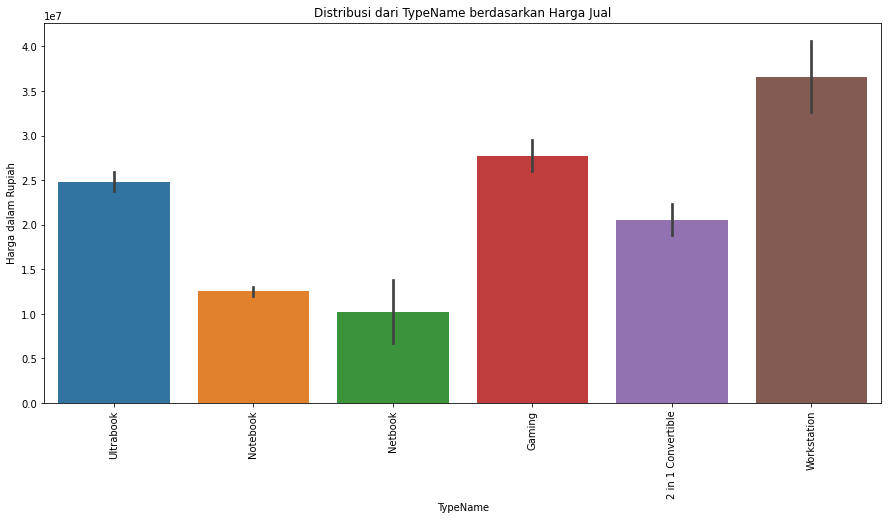

Total dari Memory:  39
Memory Laptop:  ['128GB SSD' '128GB Flash Storage' '256GB SSD' '512GB SSD' '500GB HDD'
 '256GB Flash Storage' '1TB HDD' '32GB Flash Storage'
 '128GB SSD +  1TB HDD' '256GB SSD +  256GB SSD' '64GB Flash Storage'
 '256GB SSD +  1TB HDD' '256GB SSD +  2TB HDD' '32GB SSD' '2TB HDD'
 '64GB SSD' '1.0TB Hybrid' '512GB SSD +  1TB HDD' '1TB SSD'
 '256GB SSD +  500GB HDD' '128GB SSD +  2TB HDD' '512GB SSD +  512GB SSD'
 '16GB SSD' '16GB Flash Storage' '512GB SSD +  256GB SSD'
 '512GB SSD +  2TB HDD' '64GB Flash Storage +  1TB HDD' '180GB SSD'
 '1TB HDD +  1TB HDD' '32GB HDD' '1TB SSD +  1TB HDD'
 '512GB Flash Storage' '128GB HDD' '240GB SSD' '8GB SSD' '508GB Hybrid'
 '1.0TB HDD' '512GB SSD +  1.0TB Hybrid' '256GB SSD +  1.0TB Hybrid']


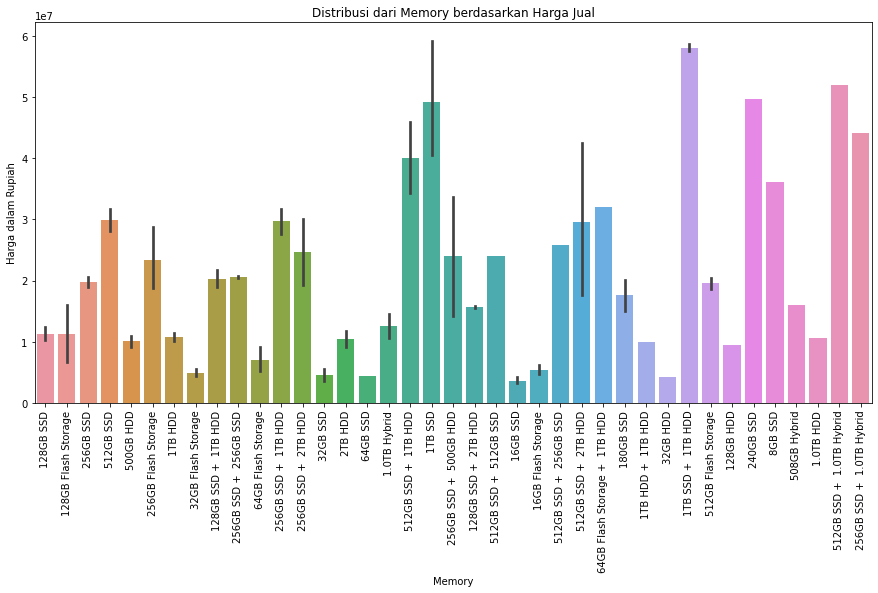

Total dari Ram:  9
Ram Laptop:  ['8GB' '16GB' '4GB' '2GB' '12GB' '6GB' '32GB' '24GB' '64GB']


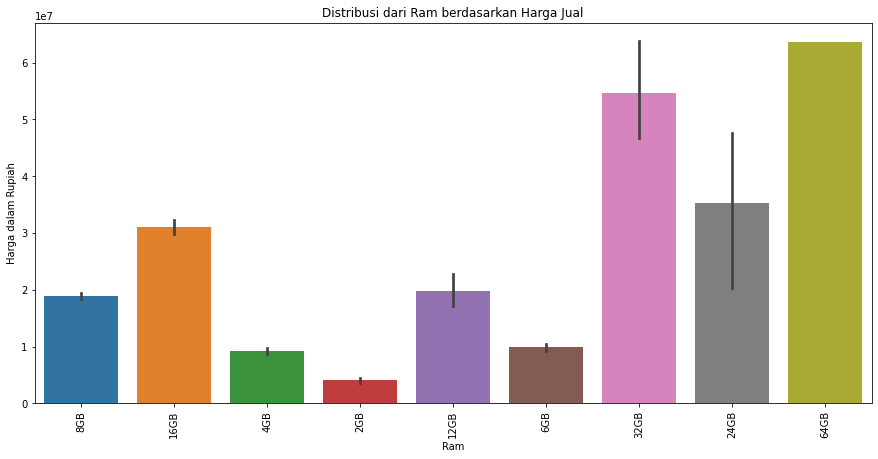

Total dari ScreenResolution:  40
ScreenResolution Laptop:  ['IPS Panel Retina Display 2560x1600' '1440x900' 'Full HD 1920x1080'
 'IPS Panel Retina Display 2880x1800' '1366x768'
 'IPS Panel Full HD 1920x1080' 'IPS Panel Retina Display 2304x1440'
 'IPS Panel Full HD / Touchscreen 1920x1080'
 'Full HD / Touchscreen 1920x1080' 'Touchscreen / Quad HD+ 3200x1800'
 'IPS Panel Touchscreen 1920x1200' 'Touchscreen 2256x1504'
 'Quad HD+ / Touchscreen 3200x1800' 'IPS Panel 1366x768'
 'IPS Panel 4K Ultra HD / Touchscreen 3840x2160'
 'IPS Panel Full HD 2160x1440' '4K Ultra HD / Touchscreen 3840x2160'
 'Touchscreen 2560x1440' '1600x900' 'IPS Panel 4K Ultra HD 3840x2160'
 '4K Ultra HD 3840x2160' 'Touchscreen 1366x768'
 'IPS Panel Full HD 1366x768' 'IPS Panel 2560x1440'
 'IPS Panel Full HD 2560x1440' 'IPS Panel Retina Display 2736x1824'
 'Touchscreen 2400x1600' '2560x1440' 'IPS Panel Quad HD+ 2560x1440'
 'IPS Panel Quad HD+ 3200x1800'
 'IPS Panel Quad HD+ / Touchscreen 3200x1800'
 'IPS Panel Touchscree

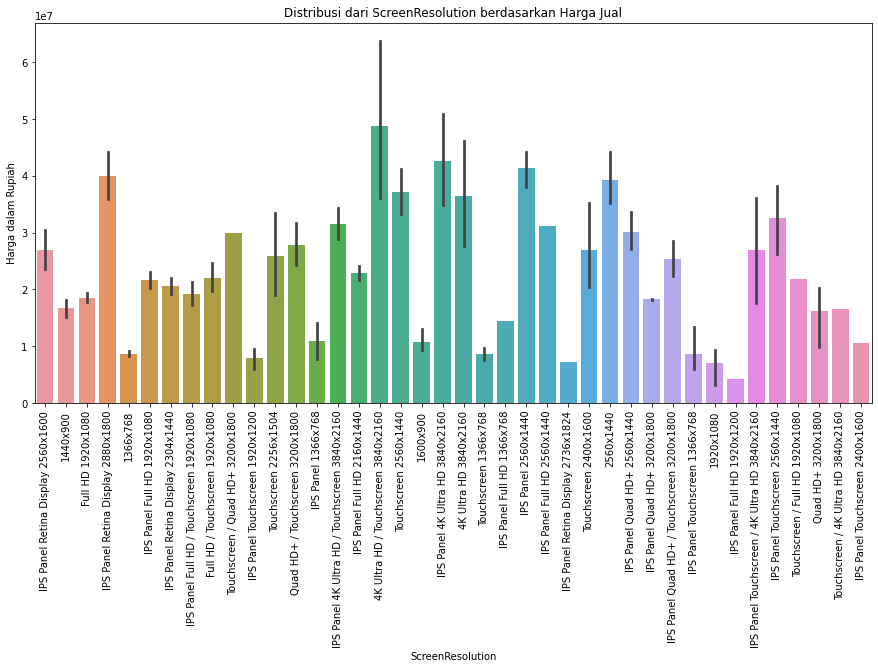

Total dari OpSys:  9
OpSys Laptop:  ['macOS' 'No OS' 'Windows 10' 'Mac OS X' 'Linux' 'Android' 'Windows 10 S'
 'Chrome OS' 'Windows 7']


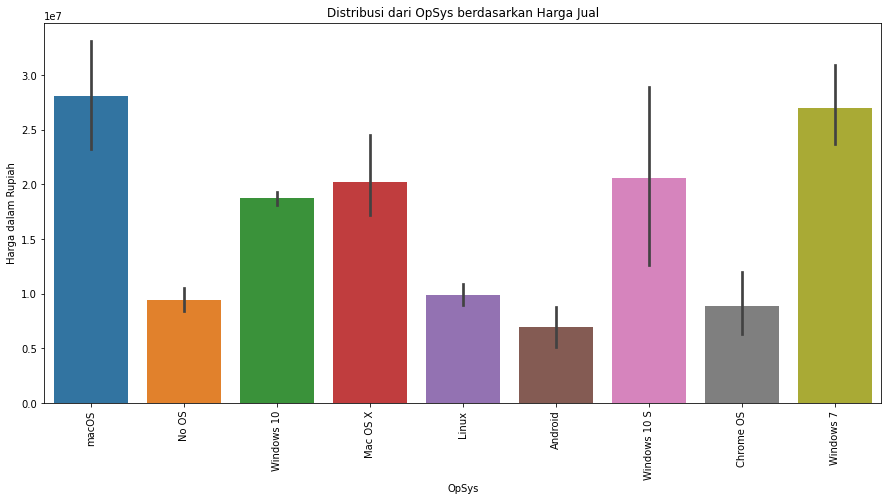

In [ ]:
for var in cat_vars:
    plot_cat_var(df, var)

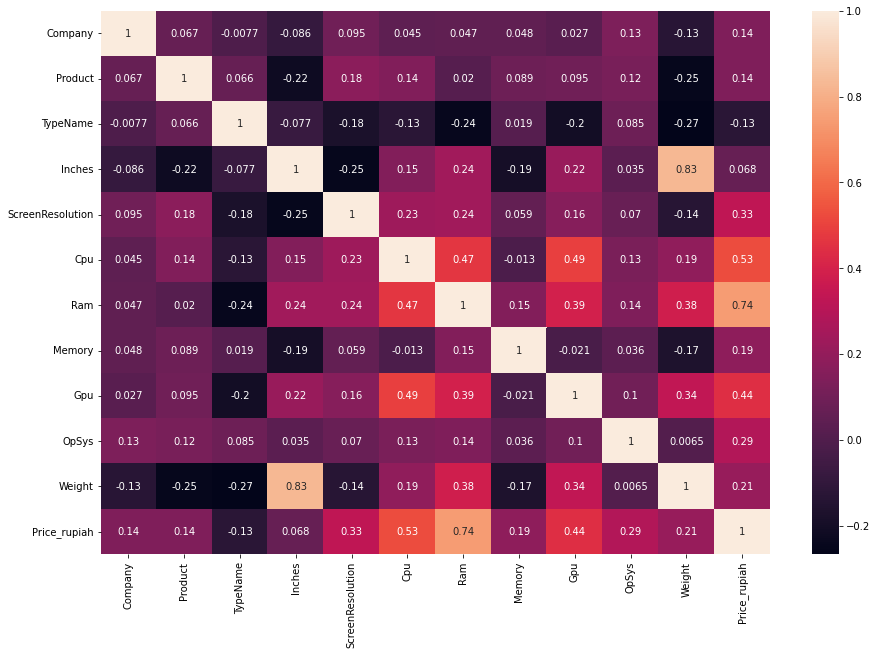

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(df2.corr(), annot=True)

#Model

In [ ]:
#Splitting Data

train, test = train_test_split(df2, test_size=0.1, random_state=0)

print(f"No. of training examples: {train.shape[0]}")
print(f"No. of testing examples: {test.shape[0]}")

No. of training examples: 1172
No. of testing examples: 131


In [ ]:
#Mengambil X dan Y untuk Train
x_train=train.drop('Price_rupiah',axis=1)
y_train=train[['Price_rupiah']]

#Mengambil X dan Y untuk Test
x_test=test.drop('Price_rupiah',axis=1)
y_test=test[['Price_rupiah']]

#Shapes dari x_train,y_train and test data
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((1172, 11), (1172, 1), (131, 11), (131, 1))

In [ ]:
x_train.head(2)

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight
993,10,470,3,15.6,8,68,8,16,47,5,2.30
14,1,298,4,12.0,22,51,8,16,52,8,0.92


In [ ]:
y_train.head(2)

,Price_rupiah
993,21624875.0
14,20236651.0


##Linear Regression

In [ ]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [ ]:
lr_score = lr.score(x_test, y_test)
lr_score

0.6474638728599347

In [ ]:
y_pred = lr.predict(x_test)
print(y_pred.flatten()[:5])
print(y_test.values.flatten()[:5])

[12694708.16688727 35041829.76973735 31020453.91514083  8144487.91880212
 30978461.56773431]
[ 6235787. 47577930. 29800328.  9820322. 38424629.]


In [ ]:
lr_mse = mean_squared_error(y_test.values, y_pred)
lr_rmse = mean_squared_error(y_test.values, y_pred,squared=False) #RMSE
lr_mae = mean_absolute_error(y_test.values, y_pred)
lr_r = r2_score(y_test.values, y_pred)

print('Nilai Mean Squared Error      = {}'.format(lr_mse))
print('Nilai Root Mean Squared Error = {}'.format(lr_rmse))
print('Nilai Mean Absolute Error     = {}'.format(lr_mae))
print('Nilai R2                      = {}'.format(lr_r))

Nilai Mean Squared Error      = 57639683525262.97
Nilai Root Mean Squared Error = 7592080.316044014
Nilai Mean Absolute Error     = 5057870.645936445
Nilai R2                      = 0.6474638728599347


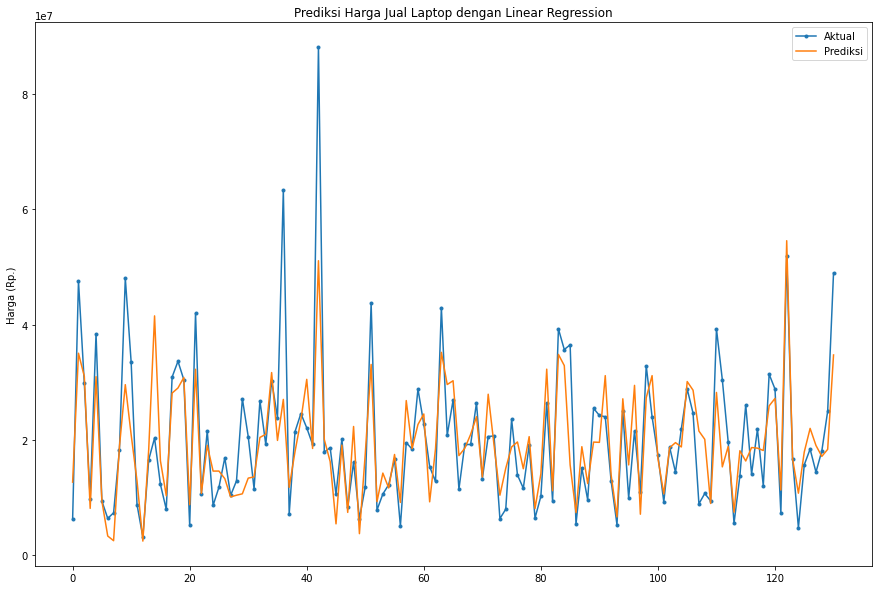

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(range(len(y_test)), y_test, marker='.', label="Aktual")
plt.plot(range(len(y_test)), y_pred.flatten(), label="Prediksi")
plt.ylabel('Harga (Rp.)')
plt.title('Prediksi Harga Jual Laptop dengan Linear Regression')
plt.legend()
plt.show()

In [ ]:
hasil_prediksi = pd.DataFrame()
hasil_prediksi['Aktual'] = y_test.values.flatten()
hasil_prediksi['Linear Regression'] = y_pred.flatten()
hasil_prediksi['Linear Regression'] = hasil_prediksi['Linear Regression'].round(0)
hasil_prediksi.head(4)

,Aktual,Linear Regression
0,6235787.0,12694708.0
1,47577930.0,35041830.0
2,29800328.0,31020454.0
3,9820322.0,8144488.0


##DecisionTree

In [ ]:
dt = DecisionTreeRegressor()
dt.fit(x_train, y_train)

DecisionTreeRegressor()

In [ ]:
dt_score = dt.score(x_test, y_test)
dt_score

0.7130623421852879

In [ ]:
y_pred = dt.predict(x_test)
print(y_pred.flatten()[:5])
print(y_test.values.flatten()[:5])

[ 5273969. 20230239. 31659842.  7774696. 32500151.]
[ 6235787. 47577930. 29800328.  9820322. 38424629.]


In [ ]:
dt_mse = mean_squared_error(y_test.values, y_pred)
dt_rmse = mean_squared_error(y_test.values, y_pred,squared=False) #RMSE
dt_mae = mean_absolute_error(y_test.values, y_pred)
dt_r = r2_score(y_test.values, y_pred)

print('Nilai Mean Squared Error      = {}'.format(dt_mse))
print('Nilai Root Mean Squared Error = {}'.format(dt_rmse))
print('Nilai Mean Absolute Error     = {}'.format(dt_mae))
print('Nilai R2                      = {}'.format(dt_r))

Nilai Mean Squared Error      = 46914328815296.52
Nilai Root Mean Squared Error = 6849403.537191872
Nilai Mean Absolute Error     = 4092178.2213740456
Nilai R2                      = 0.7130623421852879


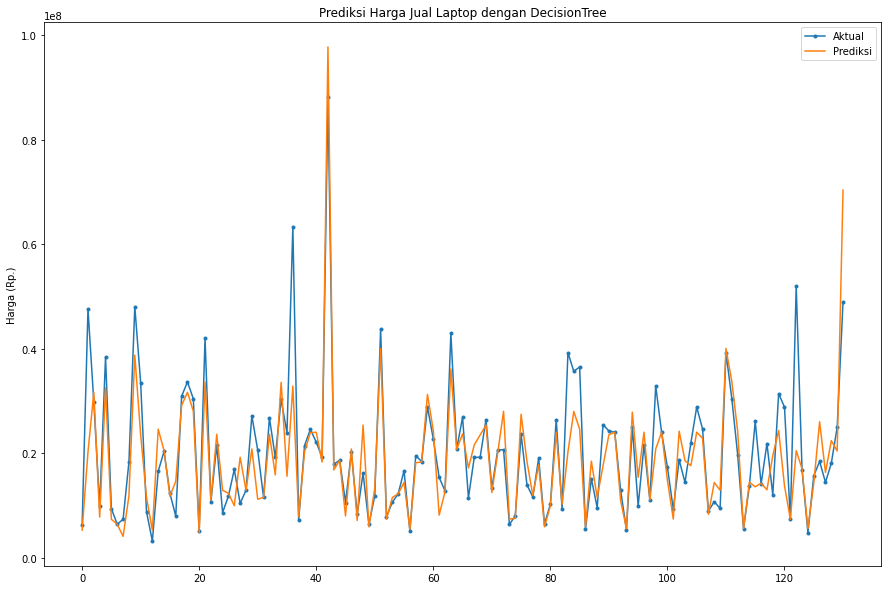

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(range(len(y_test)), y_test, marker='.', label="Aktual")
plt.plot(range(len(y_test)), y_pred.flatten(), label="Prediksi")
plt.ylabel('Harga (Rp.)')
plt.title('Prediksi Harga Jual Laptop dengan DecisionTree')
plt.legend()
plt.show()

In [ ]:
hasil_prediksi['DecisionTree'] = y_pred.flatten()
hasil_prediksi['DecisionTree'] = hasil_prediksi['DecisionTree'].round(0)
hasil_prediksi.head(4)

,Aktual,Linear Regression,DecisionTree
0,6235787.0,12694708.0,5273969.0
1,47577930.0,35041830.0,20230239.0
2,29800328.0,31020454.0,31659842.0
3,9820322.0,8144488.0,7774696.0


##RandomForest

In [ ]:
rf = RandomForestRegressor(max_depth=10, random_state=0)

rf.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestRegressor(max_depth=10, random_state=0)

In [ ]:
rf_score = rf.score(x_test, y_test)
rf_score

0.8417541799933198

In [ ]:
y_pred = rf.predict(x_test)
print(y_pred.flatten()[:5])
print(y_test.values.flatten()[:5])

[ 6574939.25305123 35343886.43680906 28273078.58440552  9559491.01581493
 31971419.17953359]
[ 6235787. 47577930. 29800328.  9820322. 38424629.]


In [ ]:
rf_mse = mean_squared_error(y_test.values, y_pred)
rf_rmse = mean_squared_error(y_test.values, y_pred,squared=False) #RMSE
rf_mae = mean_absolute_error(y_test.values, y_pred)
rf_r = r2_score(y_test.values, y_pred)

print('Nilai Mean Squared Error      = {}'.format(rf_mse))
print('Nilai Root Mean Squared Error = {}'.format(rf_rmse))
print('Nilai Mean Absolute Error     = {}'.format(rf_mae))
print('Nilai R2                      = {}'.format(rf_r))

Nilai Mean Squared Error      = 25873203573138.582
Nilai Root Mean Squared Error = 5086570.905151975
Nilai Mean Absolute Error     = 3302040.9809719096
Nilai R2                      = 0.8417541799933198


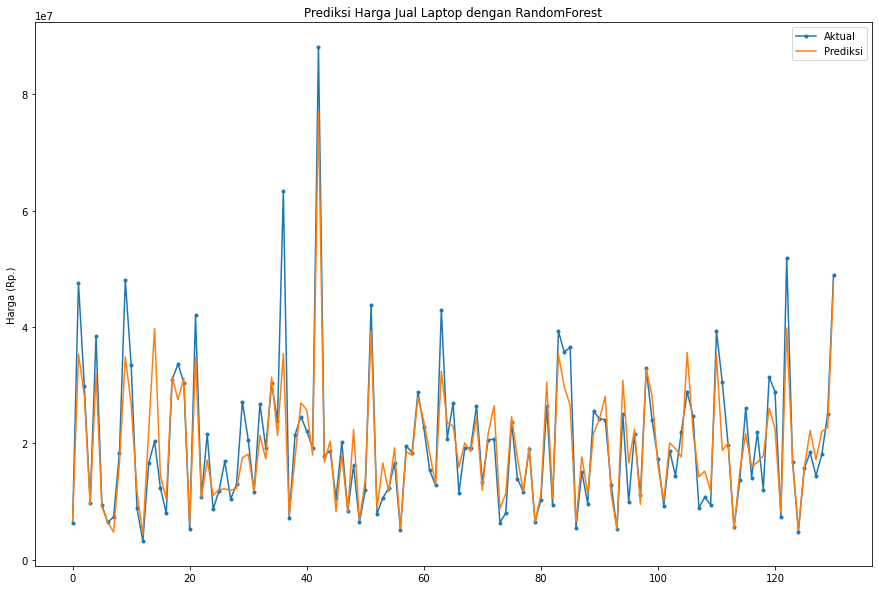

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(range(len(y_test)), y_test, marker='.', label="Aktual")
plt.plot(range(len(y_test)), y_pred.flatten(), label="Prediksi")
plt.ylabel('Harga (Rp.)')
plt.title('Prediksi Harga Jual Laptop dengan RandomForest')
plt.legend()
plt.show()

In [ ]:
hasil_prediksi['RandomForest'] = y_pred.flatten()
hasil_prediksi['RandomForest'] = hasil_prediksi['RandomForest'].round(0)
hasil_prediksi.head(4)

,Aktual,Linear Regression,DecisionTree,RandomForest
0,6235787.0,12694708.0,5273969.0,6574939.0
1,47577930.0,35041830.0,20230239.0,35343886.0
2,29800328.0,31020454.0,31659842.0,28273079.0
3,9820322.0,8144488.0,7774696.0,9559491.0


##Deep Neural Network (DNN)

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [ ]:
model = Sequential()
#model.add(Dense(1000, input_shape=(11)))
model.add(Dense(1000, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')

In [ ]:
model.summary()

ValueError: ignored

In [ ]:
history = model.fit(x_train, y_train, epochs=200)

Epoch 1/200
37/37 [==============================] - 1s 3ms/step - loss: 436786262179840.0000
Epoch 2/200
37/37 [==============================] - 0s 3ms/step - loss: 436738849767424.0000
Epoch 3/200
37/37 [==============================] - 0s 3ms/step - loss: 436632113119232.0000
Epoch 4/200
37/37 [==============================] - 0s 3ms/step - loss: 436448100614144.0000
Epoch 5/200
37/37 [==============================] - 0s 3ms/step - loss: 436184094343168.0000
Epoch 6/200
37/37 [==============================] - 0s 3ms/step - loss: 435835061141504.0000
Epoch 7/200
37/37 [==============================] - 0s 3ms/step - loss: 435398819971072.0000
Epoch 8/200
37/37 [==============================] - 0s 3ms/step - loss: 434883927212032.0000
Epoch 9/200
37/37 [==============================] - 0s 3ms/step - loss: 434283772641280.0000
Epoch 10/200
37/37 [==============================] - 0s 3ms/step - loss: 433607852163072.0000
Epoch 11/200
37/37 [==============================] - 0s 2m

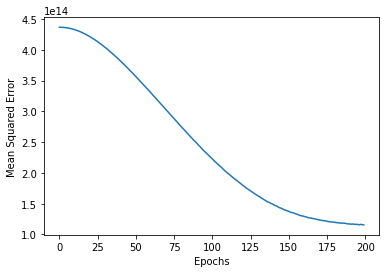

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.show()

In [ ]:
y_pred = model.predict(x_test)
y_pred.shape

(131, 1)

In [ ]:
print(y_pred[:5].flatten())
print(y_test[:5].values.flatten())

[18089470.  23933332.  16071552.   6437078.5 26184980. ]
[ 6235787. 47577930. 29800328.  9820322. 38424629.]


In [ ]:
dnn_mse = mean_squared_error(y_test.values, y_pred)
dnn_rmse = mean_squared_error(y_test.values, y_pred,squared=False) #RMSE
dnn_mae = mean_absolute_error(y_test.values, y_pred)
dnn_r = r2_score(y_test.values, y_pred)

print('Nilai Mean Squared Error      = {}'.format(dnn_mse))
print('Nilai Root Mean Squared Error = {}'.format(dnn_rmse))
print('Nilai Mean Absolute Error     = {}'.format(dnn_mae))
print('Nilai R2                      = {}'.format(dnn_r))

Nilai Mean Squared Error      = 167482541261763.7
Nilai Root Mean Squared Error = 12941504.59806601
Nilai Mean Absolute Error     = 8829396.410305344
Nilai R2                      = -0.024357575352058403


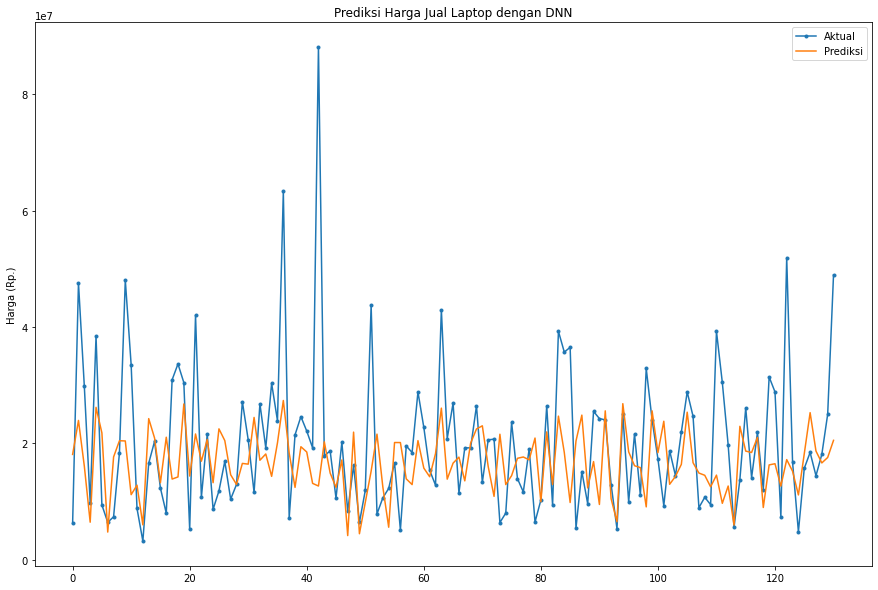

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(range(len(y_test)), y_test, marker='.', label="Aktual")
plt.plot(range(len(y_test)), y_pred.flatten(), label="Prediksi")
plt.ylabel('Harga (Rp.)')
plt.title('Prediksi Harga Jual Laptop dengan DNN')
plt.legend()
plt.show()

In [ ]:
hasil_prediksi['DNN'] = y_pred.flatten()
hasil_prediksi['DNN'] = hasil_prediksi['DNN'].round(0)
hasil_prediksi.head(4)

,Aktual,Linear Regression,DecisionTree,RandomForest,DNN
0,6235787.0,12694708.0,5273969.0,6574939.0,18089470.0
1,47577930.0,35041830.0,20230239.0,35343886.0,23933332.0
2,29800328.0,31020454.0,31659842.0,28273079.0,16071552.0
3,9820322.0,8144488.0,7774696.0,9559491.0,6437078.0


#Perbandingan

In [ ]:
print('Nilai MSE LinearRegression  = {}'.format(lr_mse))
print('Nilai MSE DecisionTree      = {}'.format(dt_mse))
print('Nilai MSE RandomForest      = {}'.format(rf_mse))
print('Nilai MSE DNN               = {}'.format(dnn_mse))
print('========================================================')
print('Nilai RMSE LinearRegression = {}'.format(lr_rmse))
print('Nilai RMSE DecisionTree     = {}'.format(dt_rmse))
print('Nilai RMSE RandomForest     = {}'.format(rf_rmse))
print('Nilai RMSE DNN              = {}'.format(dnn_rmse))
print('========================================================')
print('Nilai MAE LinearRegression  = {}'.format(lr_mae))
print('Nilai MAE DecisionTree      = {}'.format(dt_mae))
print('Nilai MAE RandomForest      = {}'.format(rf_mae))
print('Nilai MAE DNN               = {}'.format(dnn_mae))
print('========================================================')
print('Nilai R2 Linear Regression  = {}'.format(lr_r))
print('Nilai R2 DecisionTree       = {}'.format(dt_r))
print('Nilai R2 RandomForest       = {}'.format(rf_r))
print('Nilai R2 DNN                = {}'.format(dnn_r))

Nilai MSE LinearRegression  = 57639683525262.97
Nilai MSE DecisionTree      = 46914328815296.52
Nilai MSE RandomForest      = 25873203573138.582
Nilai MSE DNN               = 167482541261763.7
Nilai RMSE LinearRegression = 7592080.316044014
Nilai RMSE DecisionTree     = 6849403.537191872
Nilai RMSE RandomForest     = 5086570.905151975
Nilai RMSE DNN              = 12941504.59806601
Nilai MAE LinearRegression  = 5057870.645936445
Nilai MAE DecisionTree      = 4092178.2213740456
Nilai MAE RandomForest      = 3302040.9809719096
Nilai MAE DNN               = 8829396.410305344
Nilai R2 Linear Regression  = 0.6474638728599347
Nilai R2 DecisionTree       = 0.7130623421852879
Nilai R2 RandomForest       = 0.8417541799933198
Nilai R2 DNN                = -0.024357575352058403


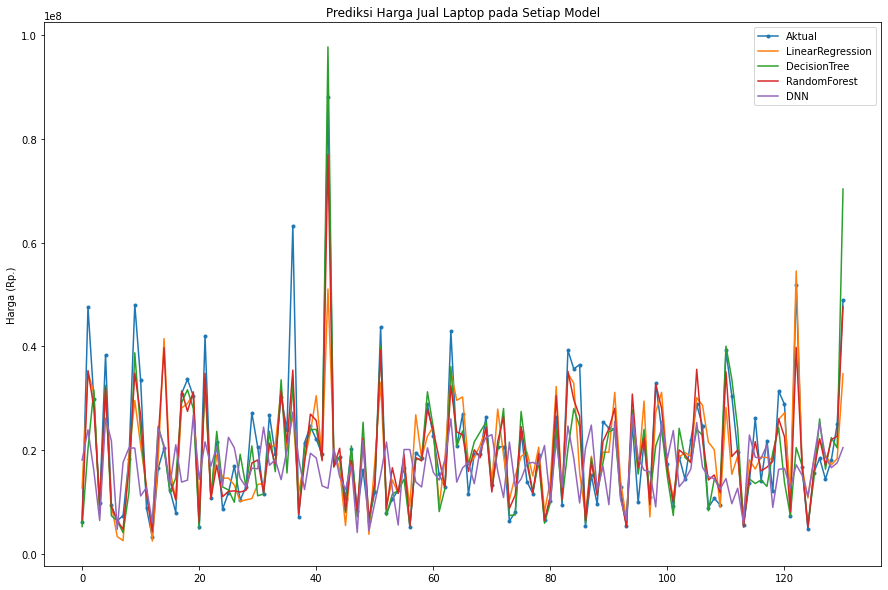

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(range(len(y_test)), y_test, marker='.', label="Aktual")
plt.plot(range(len(y_test)), hasil_prediksi['Linear Regression'], label="LinearRegression")
plt.plot(range(len(y_test)), hasil_prediksi['DecisionTree'], label="DecisionTree")
plt.plot(range(len(y_test)), hasil_prediksi['RandomForest'], label="RandomForest")
plt.plot(range(len(y_test)), hasil_prediksi['DNN'], label="DNN")
plt.ylabel('Harga (Rp.)')
plt.title('Prediksi Harga Jual Laptop pada Setiap Model')
plt.legend()
plt.show()

#Output Hasil

In [ ]:
hasil_prediksi.to_csv('Hasil Prediksi.csv',index=False)

In [ ]:
hasil_prediksi

,Aktual,Linear Regression,DecisionTree,RandomForest,DNN
0,6235787.0,12694708.0,5273969.0,6574939.0,18089470.0
1,47577930.0,35041830.0,20230239.0,35343886.0,23933332.0
2,29800328.0,31020454.0,31659842.0,28273079.0,16071552.0
3,9820322.0,8144488.0,7774696.0,9559491.0,6437078.0
4,38424629.0,30978462.0,32500151.0,31971419.0,26184980.0
...,...,...,...,...,...
126,18434845.0,22013761.0,26033207.0,22209397.0,25273920.0
127,14427270.0,19051026.0,16334715.0,17185468.0,18670742.0
128,18098209.0,17158291.0,22426390.0,22031843.0,16628357.0
129,24991238.0,18383043.0,20438632.0,22687922.0,17562966.0
